## Building a computer vision model with TensorFlow

from developers.google.com \
the goal is to train a neural network to recognize items of clothing from the Fashion MNIST dataset:
* 70,000 items
* 10 categories
* 28x28 grayscale image

In [7]:
# Google's package for ML
import tensorflow as tf

In [8]:
print(tf.__version__)

2.10.1


In [9]:
# DataFrames!
import pandas as pd

# Data Visulations!
import matplotlib.pyplot as plt

In [10]:
# import image module
from IPython.display import Image
  
# some dataset items
Image(url="Data/images/clothes.png", width = 400, height = 400)

In [11]:
# creating a DataFrame of the dataset's labels
descriptions = {'Description': ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
                                'Sandal','Shirt', 'Sneaker', 'Bag', 'Ankle boot']}
label_df = pd.DataFrame(data=descriptions)
label_df

,Description
0,T-shirt/top
1,Trouser
2,Pullover
3,Dress
4,Coat
5,Sandal
6,Shirt
7,Sneaker
8,Bag
9,Ankle boot


In [12]:
# Accessing the Fashion MNIST data through the Keras API (Application Programming Interface)
# https://keras.io/api/datasets/

f_mnist_data = tf.keras.datasets.fashion_mnist

In [13]:
# calling load_data() returns two sets of two lists: training values and testing values
# I note this removes the need to use a function such as sklearn.model_selection.train_test_split¶
# to create your own train/test splits
(training_images, training_labels), (test_images, test_labels) = f_mnist_data.load_data()

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

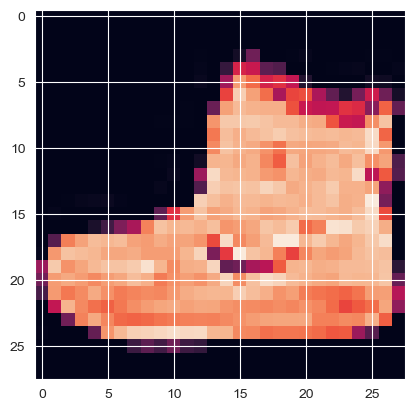

In [28]:
# In fact, the entire data pre-processing step is removed from this tutorial. When working with images
# in a datset you would need to convert them into xdimensional arrays containing the pixel values
plt.imshow(training_images[0])
print(training_images[0])

In [15]:
# normalization
training_images = training_images/ 255.0
test_images = test_images/ 255.0

**Designing the Model**
* *Sequential* defines a sequence of layers in the neural network
* *Flatten* takes a square and turns it into a one-dimensional vector
* *Dense* addas a layer of neurons
* *Activation* functions tell each layer of neurons what to do. There are lots of options, here are a few:
* *Relu* passes values of 0 or greater to the next layer
* *Softmax* passes the greatest value to the next layer


In [16]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [17]:
# Next step is to create the model, compiling it with an optimizer and loss function
# Afterwords, train the model on training data and labels. The model will try to find
# a relatinoship between the training data and its training labels
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images,training_labels, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4968 - accuracy: 0.8266
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3731 - accuracy: 0.8662
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3355 - accuracy: 0.8793
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3119 - accuracy: 0.8865
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2950 - accuracy: 0.8917


The model figured out a pattern match between the image and the labels that worked 89% of the time

In [18]:
# Testing the mdoel on data it hasn't seen: the test set
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3739 - accuracy: 0.8675


[0.3739490807056427, 0.8675000071525574]

**Exploration Exercises!**

Ex1

In [27]:
classifications = model.predict(test_images)
print(classifications[0])

313/313 [==============================] - 0s 946us/step
[5.1930124e-07 8.8354447e-08 1.0624644e-06 4.3758416e-07 1.4840514e-06
 3.7550048e-03 1.0075442e-05 5.7621993e-02 1.3362069e-05 9.3859601e-01]


In [26]:
print(test_labels[0])

9


The output of the model is a list of 10 numbers. Those numbers are a probability that the value being classified is the corresponding label. The 10th element of the list is the greatest, the model predicts that the item it is classifying is most likely an ankle boot.

Ex2

Experiment with different values for the dense layer with 512 neurons:

In [36]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [37]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images,training_labels, epochs = 5)
## accuracy is quite similar to just using 128 & 10 nuerons

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4734 - accuracy: 0.8317
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3585 - accuracy: 0.8691
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3219 - accuracy: 0.8819
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2971 - accuracy: 0.8905
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2804 - accuracy: 0.8970


1024 nuerons:

In [38]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [40]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images,training_labels, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2670 - accuracy: 0.9003
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2518 - accuracy: 0.9046
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2404 - accuracy: 0.9094
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2292 - accuracy: 0.9130
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2199 - accuracy: 0.9182
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2132 - accuracy: 0.9196
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2035 - accuracy: 0.9245
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1966 - accuracy: 0.9260
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1899 - accuracy: 0.9284
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.182

In [41]:
# increased the number of epochs. in basic terms,
# an epoch is the number of passes a training dataset takes around an algorithm

Ex3\
Thinking about the Flatten() layer. We can flatten the data before putting into the model

Ex4\
Why are there 10 final output layers? \
A rule of thumb: the number of neurons in the last layer should match the number of classes you are classifying for.

Ex5
thinking about the effects of additional layers in the network. Becomes critical for complex data


Ex6
Normalization and its importance. Converting all the weights to a universal scale. (prevent biased weights)

Looking into callbacks: stopping the training when you reach a desired value?

In [3]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.88):
            print("\nReached 88% accuracy, cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])


Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4720 - accuracy: 0.8319
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3571 - accuracy: 0.8684
Epoch 3/5
1856/1875 [============================>.] - ETA: 0s - loss: 0.3209 - accuracy: 0.8814
Reached 88% accuracy, cancelling training!
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3207 - accuracy: 0.8816
